---
title: Practicum
subtitle: Gráficos con Python
---



# Tips database

## Sobre la base

* Utilizaremos un archivo de valores separados por comas $\leadsto$ `tips.csv`.
* Las variables (columnas) empleadas en esta base son:
    - `total_bill`: total de la cuenta.
    - `tip`: propina para el camarero/a.
    - `sex`: sexo del camarero/a.
    - `smoker`: la mesa atendida fue en la sección de fumadores?
    - `day`: día de la semana del servicio.
    - `size`: cantidad de comensales atendidos.
    
* Aplicaremos algunas técnicas descriptivas para explorar la distribucíon de las propinas.



## Cargando módulos

> First things first, importemos módulos estandar en el análisis de datos con Python.

In [24]:
# Esta línea permite renderizar los gráficos en el mismo notebook.
%matplotlib inline 
# Librería para la manipulación y limpieza de bases de datos.
import pandas as pd
# Librería para el procesamiento numérico
import numpy as np 
# Librería para gráficar
import matplotlib.pyplot as plt
# Modficar el estilo default de gráficos de Matplotlib.
plt.style.use('seaborn') 

El primer punto a atacar, es inspeccionar la base. Saber con qué estamos trabajando.

In [25]:
# cargamos nuestro archivo .csv que se encuentra en la misma carpeta del notebook.
df = pd.read_csv('./tips.csv')
# examinemos las primeras 5 filas del archivo.
print(df.head())
# describamos las columnas. esto sólo funciona para las columnas numéricas (int o float).
print(df.describe())

# Describamos las frecuencias de cada una de las columnas strings. Agregamos len(df) para obtener porcentajes
# .value_counts nos permite obtener frecuencias discretas para cada nivel de nuestra columna.
print(df.sex.value_counts()/len(df))
print(df.smoker.value_counts()/len(df))
print(df.day.value_counts()/len(df))
print(df.time.value_counts()/len(df))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
Male      0.643443
Female    0.356557
Name: sex, dtype: float64
No     0.618852
Yes    0.381148
Name: smoker, dtype: float64
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64
Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64


* Python por sí solo, procesa todo en formato numérico $\nRightarrow$ A diferencia de otros lenguajes o software diseñados para el análisis que presentan una serie de declaraciones para transformar strings a factores (`recode` en Stata y `as.factor(x)` en R).

* Debemos convertir las cadenas a integrales. `pandas` es muy útil para ello y presenta una serie de métodos para ello. Vamos a ocupar `replace`, que reemplaza valores antiguos de una serie (columna) por otros.

In [26]:
# Para traspasar nuestros valores de string a float, utilizamos .replace
df['sex'].replace(['Female', 'Male'], [1, 0], inplace=True)
df['smoker'].replace(['Yes', 'No'], [1, 0], inplace=True)

* Veamos como quedaron nuestras nuevas variables.

In [27]:
print(df.head())

   total_bill   tip  sex  smoker  day    time  size
0       16.99  1.01    1       0  Sun  Dinner     2
1       10.34  1.66    0       0  Sun  Dinner     3
2       21.01  3.50    0       0  Sun  Dinner     3
3       23.68  3.31    0       0  Sun  Dinner     2
4       24.59  3.61    1       0  Sun  Dinner     4


* Genial, ahora necesitamos agrupar categorías de la variable `day` en un indicador binario `weekend`. Para ello utilizaremos lo siguiente.

In [28]:
# Para recodificar múltiples valores en un nuevo valor, utilizamos .assign
df = df.assign(weekend = df.day.map({'Sat': 1, 'Sun': 1, 'Thur': 0, 'Fri': 0}))
print(df['weekend'].value_counts())

1    163
0     81
Name: weekend, dtype: int64


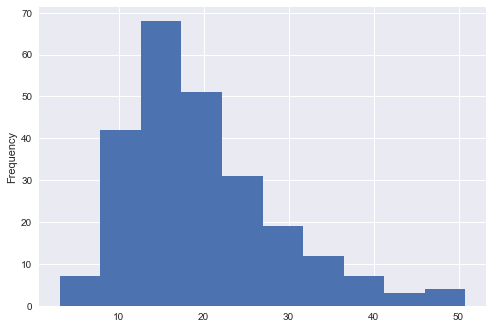

In [29]:
df.total_bill.plot(kind='hist')

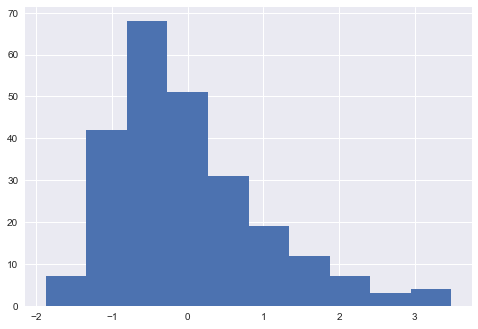

In [30]:

# Para obtener la media de una columna, utilizamos .mean()
mu = df['total_bill'].mean()
# Para obtener la desviación estandar de una columna, utilizamos .std()
sigma = df['total_bill'].std()

# Con mu y sigma estimados, estamos listos para poder generar una distribucíon normalizada del total de la cuenta.
df = df.assign(bill_std = (df['total_bill'] - mu) / sigma)

# Grafiquemos esta nueva variable
df.bill_std.hist()

* La versión estandarizada aclara el hecho que los consumos en el restaurant tienen a concentrarse bajo la media.
* Ahora que estandarizamos la variable, tenemos una mejor apreciación por la tendencia a consumir bajo la media.
* Para estandarizar las demás variables, refactorizaremos el código en una función.

In [31]:
def standarize(x):
    mu = x.mean()
    sigma = x.std()
    tmp = (x - mu) / sigma
    return tmp

df = df.assign(tips_std = standarize(df['tip']))
print(df.head())

   total_bill   tip  sex  smoker  day    time  size  weekend  bill_std  \
0       16.99  1.01    1       0  Sun  Dinner     2        1 -0.314066   
1       10.34  1.66    0       0  Sun  Dinner     3        1 -1.061054   
2       21.01  3.50    0       0  Sun  Dinner     3        1  0.137497   
3       23.68  3.31    0       0  Sun  Dinner     2        1  0.437416   
4       24.59  3.61    1       0  Sun  Dinner     4        1  0.539635   

   tips_std  
0 -1.436993  
1 -0.967217  
2  0.362610  
3  0.225291  
4  0.442111  


## Gráficos

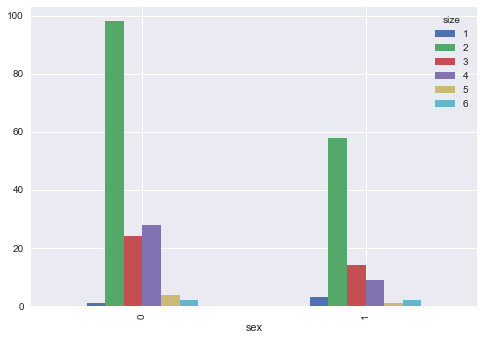

In [32]:
cross = pd.crosstab(df['sex'],df['size'] )
cross.plot(kind='bar')

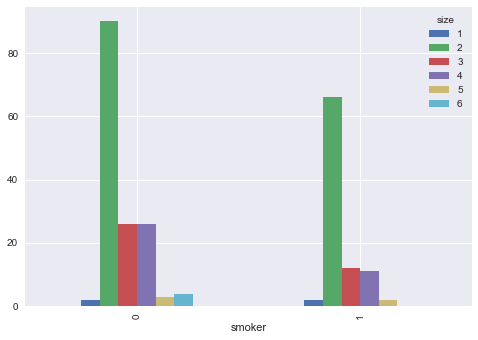

In [33]:
cross_2 = pd.crosstab(df['smoker'], df['size'])
cross_2.plot(kind="bar")

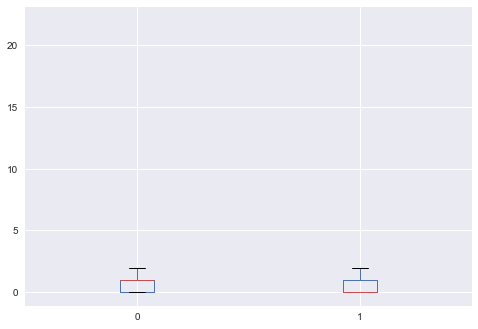

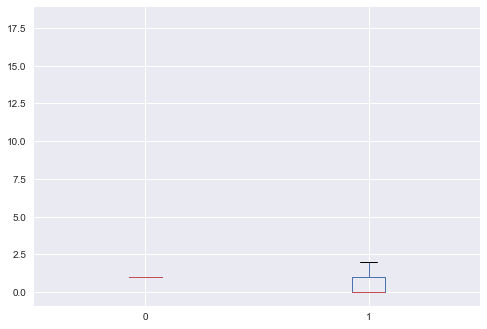

In [34]:
cross_3 = pd.crosstab(df['tip'], df['sex'])
cross_3.plot(kind='box')
pd.crosstab(df['tip'], df['smoker']).plot(kind = 'box')

In [45]:
demo = df[['total_bill', 'tip']]
print(demo.corr())

            total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


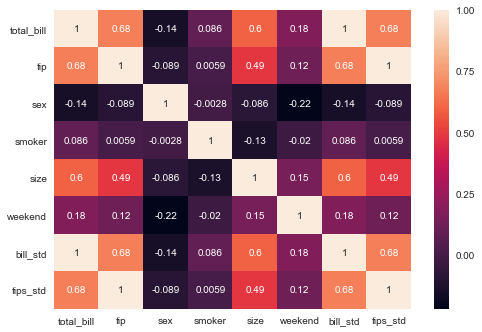

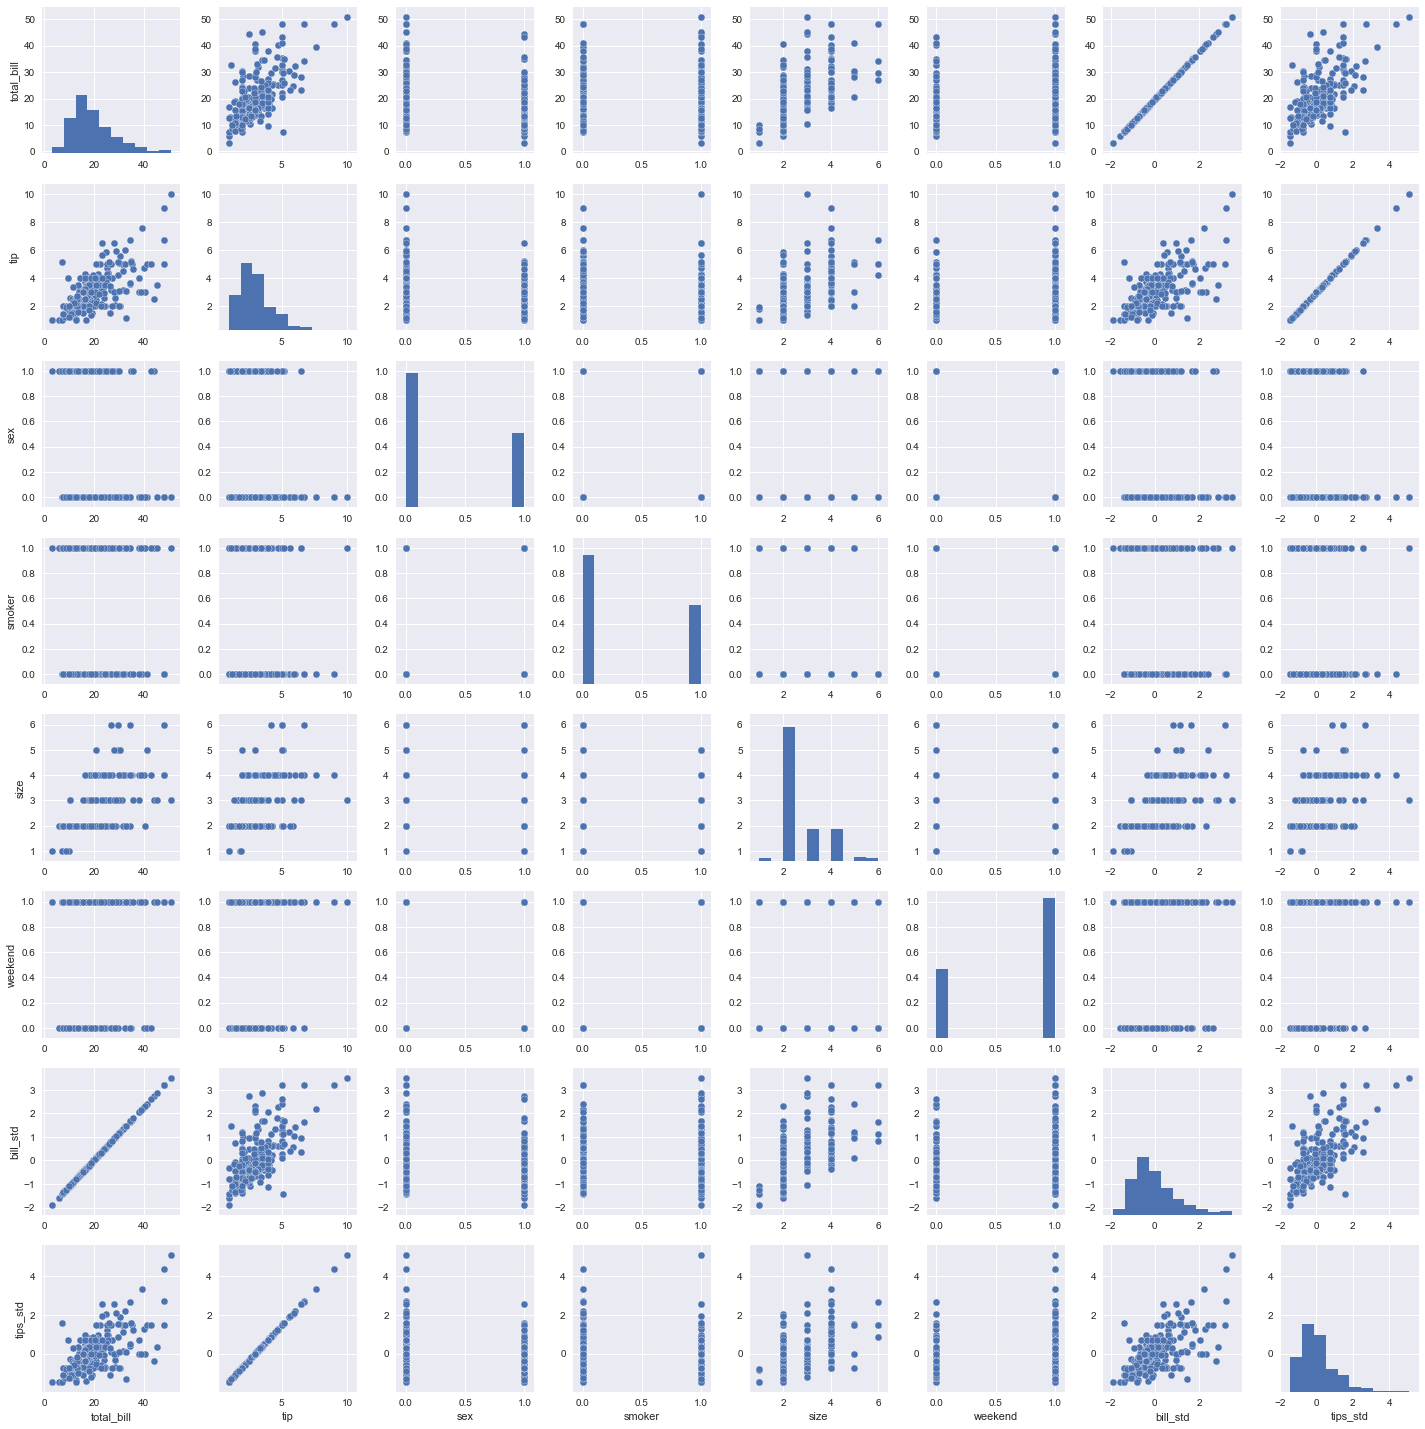

In [36]:
aaa = df.corr()


# Existen módulos mas avanzados que vienen con una serie de diseños muy útiles
import seaborn as sns

sns.heatmap(aaa, annot=True)

sns.pairplot(df)

In [37]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [ go.Scatter(x=df.total_bill, y=df.tip, mode='markers',)]
py.iplot(data)

In [38]:
data = [ go.Scatter(x = df['size'], y= df.total_bill, mode='markers', opacity=.5, )]
py.iplot(data)

## Modelación

In [39]:
import statsmodels.api as statm
import statsmodels.formula.api as frm

In [40]:
model_1 = frm.ols('tip ~ size', data=df).fit()
print(model_1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.236   
Dependent Variable: tip              AIC:                787.1273
Date:               2018-03-02 16:13 BIC:                794.1216
No. Observations:   244              Log-Likelihood:     -391.56 
Df Model:           1                F-statistic:        76.18   
Df Residuals:       242              Prob (F-statistic): 4.30e-16
R-squared:          0.239            Scale:              1.4621  
-------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     1.1691     0.2234   5.2330   0.0000   0.7290   1.6092
size          0.7118     0.0816   8.7279   0.0000   0.5512   0.8725
-----------------------------------------------------------------
Omnibus:             81.369       Durbin-Watson:          1.820  
Prob(Omnibus):   

In [41]:
model_2 = frm.ols('tip ~ total_bill', data=df).fit()
print(model_2.summary2())


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.454   
Dependent Variable: tip              AIC:                705.0762
Date:               2018-03-02 16:13 BIC:                712.0705
No. Observations:   244              Log-Likelihood:     -350.54 
Df Model:           1                F-statistic:        203.4   
Df Residuals:       242              Prob (F-statistic): 6.69e-34
R-squared:          0.457            Scale:              1.0446  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    0.9203     0.1597    5.7612   0.0000   0.6056   1.2349
total_bill   0.1050     0.0074   14.2604   0.0000   0.0905   0.1195
-----------------------------------------------------------------
Omnibus:              20.185       Durbin-Watson:          2.151 
Prob(Omnibus):   

In [42]:
model_3 = frm.ols('tip ~ total_bill + sex', data=df).fit()
print(model_3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.452   
Dependent Variable: tip              AIC:                707.0387
Date:               2018-03-02 16:13 BIC:                717.5302
No. Observations:   244              Log-Likelihood:     -350.52 
Df Model:           2                F-statistic:        101.3   
Df Residuals:       241              Prob (F-statistic): 1.18e-32
R-squared:          0.457            Scale:              1.0488  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       0.9067    0.1750   5.1817  0.0000   0.5620  1.2513
total_bill      0.1052    0.0075  14.1097  0.0000   0.0905  0.1199
sex             0.0266    0.1383   0.1924  0.8476  -0.2459  0.2991
-----------------------------------------------------------------
Omnibus:             

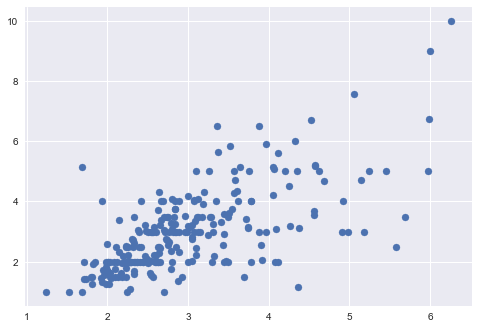

In [43]:
plt.scatter(model_2.predict(), df['tip'])

In [44]:
print(frm.ols('tip ~ smoker', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.008506
Date:                Fri, 02 Mar 2018   Prob (F-statistic):              0.927
Time:                        16:14:00   Log-Likelihood:                -424.95
No. Observations:                 244   AIC:                             853.9
Df Residuals:                     242   BIC:                             860.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9919      0.113     26.517      0.0